In [506]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [507]:
#Import train and test datasets

train = pd.read_csv("Data for Cleaning & Modeling.csv",low_memory=False)
test = pd.read_csv("Holdout for Testing.csv",low_memory=False)

In [508]:
#display the train dataset

train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [509]:
#Lets us anlyze if we have missing values in our train & test datasets

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [510]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

Change the dtype of X1 from object to int as its a percentage value cannot be of dtype object

In [511]:
# remove '%' from interest rate column and change dtype to numeric
train['X1'] = pd.to_numeric(train['X1'].str.replace('%', ''))/100

# drop the rows with missing interest rate values
train = train.dropna(subset=['X1'])

If we analyze the dataset closely, we can confirm that we can remove X2 & X3 columns from both datasets. Because, the intrest rate prediction is indipendent of these 2 features.

In [512]:
# drop X2 and X3 from train and test datasets

train = train.drop(['X2', 'X3'], axis=1)

test = test.drop(['X2', 'X3'], axis=1)

As more than 50% of its values are missing in X16 and it is the borrower's reason for applying for the loan. Our test dataset only has 15 out 80000 values available for this column as well, so it is definitely not useful for our model, where the ultimate goal is to predict on the test set.

In [513]:
# remove X16 from train set
train = train.drop(['X16'], axis=1)

# remove X16 from test set
test = test.drop(['X16'], axis=1)

X18 not useful for our predictive model as it is the borrower-provided loan title; it's another text data type unique to each observation with seemingly no impact on our target variable (interest rate).

In [514]:
# remove X18 from training set
train.drop(['X18'], axis=1, inplace=True)

# remove X18 from test set
test.drop(['X18'], axis=1, inplace=True)

As more than 50% values are missing in X25 & X26, we can remove those columns as well.

In [515]:
# remove X25 & X26 from training set
train = train.drop(['X25','X26'], axis=1)

# remove X25 & X26 from test set
test = test.drop(['X25','X26'], axis=1)

We already have the first three of zip code column. We can remove state column as well

In [516]:
# remove X20 from training set
train = train.drop(['X20'], axis=1)

# remove X20 from test set
test = test.drop(['X20'], axis=1)

With reluctance as this feature does seem, intuitively, to correlate with loan interest rate, I'm not exactly sure it would be as strong of a predictor as other variables in the data set.

Also, since there are a few ambiguous categories (i.e. NONE, OTHER, & ANY) AND nan values, it may make more sense to remove the column altogether as we don't want to combine or impute these values at the cost of creating incorrect signal for our model.

In [517]:
# remove X12 from training set
train = train.drop(['X12'], axis=1)

# remove X12 from test set
test = test.drop(['X12'], axis=1)

Also, borrowers's job title is not the potential predictor in estimating the rate of intrest. We can drop the column X10 as well

In [518]:
# remove X10 from training set
train = train.drop(['X10'], axis=1)

# remove X10 from test set
test = test.drop(['X10'], axis=1)

Furthermore, inorder to predict the interest rates, we do not need column X11 which signifies the employment experience. Hence, we can remove that column from both test and train sets

In [519]:
# remove X11 from training set
train = train.drop(['X11'], axis=1)

# remove X10 from test set
test = test.drop(['X11'], axis=1)

In addition, the date on which the loan was received does not really tell us the estimated interest rate that we will be redicting. Hence, we are removing X15 as well

In [520]:
# remove X15 from training set
train = train.drop(['X15'], axis=1)

# remove X15 from test set
test = test.drop(['X15'], axis=1)

In [521]:
# fill NA values in X13 with mean value
train['X13'] = train['X13'].fillna((train['X13'].mean()))

In [522]:
# Fill NA values for the remaining columns
train['X8']=train['X8'].fillna(train['X8'].mode()[0])
train['X9']=train['X9'].fillna(train['X9'].mode()[0])
train['X22']=train['X22'].fillna(train['X22'].mode()[0])
train['X24']=train['X24'].fillna(train['X24'].mode()[0])
train['X27']=train['X27'].fillna(train['X27'].mode()[0])
train['X28']=train['X28'].fillna(train['X28'].mode()[0])
train['X29']=train['X29'].fillna(train['X29'].mean())
train['X30']=train['X30'].fillna(train['X30'].mode()[0])
test['X30']=test['X30'].fillna(test['X30'].mode()[0])
train.dropna(subset=['X31'], inplace=True)

In [523]:
#this is the target variable that we are predicting for our test set, so we remove this empty column
test.drop(['X1'], axis=1, inplace=True)

In [524]:
train['X8'].isnull().sum()

0

Prep the data by removing symbols and converting object dtypes to numeric

In [525]:
train['X4'] = train['X4'].str.replace('$','').str.replace(',', '')
train['X4']=pd.to_numeric(train['X4'])
train['X5'] = train['X5'].str.replace('$', '').str.replace(',', '')
train['X5']=pd.to_numeric(train['X5'])
train['X6'] = train['X6'].str.replace('$', '').str.replace(',', '')
train['X6']=pd.to_numeric(train['X6'])
train['X7'] = train['X7'].str.replace(' months', '')
train['X7']=pd.to_numeric(train['X7'])
train['X19'] = train['X19'].str.replace('x', '')
train['X19']=pd.to_numeric(train['X19'])
train['X21'] = train['X21']/100 # convert dti percentage to ratio
train['X22'] = train['X22'].astype(int) # convert to interger type
train['X24'] = train['X24'].astype(int) # convert to interger type
train['X27'] = train['X27'].astype(int) # convert to interger type
train['X28'] = train['X28'].astype(int) # convert to interger type
train['X29'] = train['X29'].astype(int) # convert to interger type
train['X30'] = train['X30'].str.replace('%', '')
train['X30'] = train['X30'].str.replace(',', '')
train['X30']=pd.to_numeric(train['X30'])
train['X30']=train['X30']/100
train['X31'] = train['X31'].astype(int) # convert to interger type

In [526]:
#initialize label encoder
le = preprocessing.LabelEncoder()

# convert categorical features to encoded integers using label encoder
train['X8'] = le.fit_transform(train['X8'])
train['X9'] = le.fit_transform(train['X9'])
train['X14'] = le.fit_transform(train['X14'])
train['X17'] = le.fit_transform(train['X17'])
train['X23'] = le.fit_transform(train['X23'])
train['X32'] = le.fit_transform(train['X32'])

To ensure there are no abnormalities (missing or outlier values) and all data types of features are as intended

In [527]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338989 non-null  float64
 1   X4      338989 non-null  int64  
 2   X5      338989 non-null  int64  
 3   X6      338989 non-null  int64  
 4   X7      338989 non-null  int64  
 5   X8      338989 non-null  int32  
 6   X9      338989 non-null  int32  
 7   X13     338989 non-null  float64
 8   X14     338989 non-null  int32  
 9   X17     338989 non-null  int32  
 10  X19     338989 non-null  int64  
 11  X21     338989 non-null  float64
 12  X22     338989 non-null  int32  
 13  X23     338989 non-null  int32  
 14  X24     338989 non-null  int32  
 15  X27     338989 non-null  int32  
 16  X28     338989 non-null  int32  
 17  X29     338989 non-null  int32  
 18  X30     338989 non-null  float64
 19  X31     338989 non-null  int32  
 20  X32     338989 non-null  int32  
dtypes: float64

In [528]:
train.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,0.1189,25000,25000,19080,36,1,8,85000.0,0,2,...,0.1948,0,201,0,10,0,28854,0.521,42,0
1,0.1071,7000,7000,673,36,1,9,65000.0,2,1,...,0.1429,0,543,0,7,0,33623,0.767,7,0
2,0.1699,25000,25000,24725,36,3,17,70000.0,0,2,...,0.1050,0,322,0,10,0,19878,0.663,17,0
3,0.1311,1200,1200,1200,36,2,11,54000.0,2,2,...,0.0547,0,254,0,5,0,2584,0.404,31,0
4,0.1357,10800,10800,10692,36,2,12,32000.0,2,2,...,0.1163,0,154,1,14,0,3511,0.256,40,0


In [529]:
test['X4'] = test['X4'].str.replace('$','').str.replace(',', '')
test['X4']=pd.to_numeric(test['X4'])
test['X5'] = test['X5'].str.replace('$', '').str.replace(',', '')
test['X5']=pd.to_numeric(test['X5'])
test['X6'] = test['X6'].str.replace('$', '').str.replace(',', '')
test['X6']=pd.to_numeric(test['X6'])
test['X7'] = test['X7'].str.replace(' months', '')
test['X7']=pd.to_numeric(test['X7'])
test['X19'] = test['X19'].str.replace('x', '')
test['X19']=pd.to_numeric(test['X19'])
test['X21'] = test['X21']/100 # convert dti percentage to ratio
test['X22'] = test['X22'].astype(int) # convert to interger type
test['X24'] = test['X24'].astype(int) # convert to interger type
test['X27'] = test['X27'].astype(int) # convert to interger type
test['X28'] = test['X28'].astype(int) # convert to interger type
test['X29'] = test['X29'].astype(int) # convert to interger type
test['X30'] = test['X30'].str.replace('%', '')
test['X30'] = test['X30'].str.replace(',', '')
test['X30']=pd.to_numeric(test['X30'])
test['X30']=test['X30']/100
test['X31'] = test['X31'].astype(int) # convert to interger type

In [530]:
#initialize label encoder
le = preprocessing.LabelEncoder()

# convert categorical features to encoded integers using label encoder
test['X8'] = le.fit_transform(test['X8'])
test['X9'] = le.fit_transform(test['X9'])
test['X14'] = le.fit_transform(test['X14'])
test['X17'] = le.fit_transform(test['X17'])
test['X23'] = le.fit_transform(test['X23'])
test['X32'] = le.fit_transform(test['X32'])

In [531]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X4      80000 non-null  int64  
 1   X5      80000 non-null  int64  
 2   X6      80000 non-null  int64  
 3   X7      80000 non-null  int64  
 4   X8      80000 non-null  int32  
 5   X9      80000 non-null  int32  
 6   X13     80000 non-null  float64
 7   X14     80000 non-null  int32  
 8   X17     80000 non-null  int32  
 9   X19     80000 non-null  int64  
 10  X21     80000 non-null  float64
 11  X22     80000 non-null  int32  
 12  X23     80000 non-null  int32  
 13  X24     80000 non-null  int32  
 14  X27     80000 non-null  int32  
 15  X28     80000 non-null  int32  
 16  X29     80000 non-null  int32  
 17  X30     80000 non-null  float64
 18  X31     80000 non-null  int32  
 19  X32     80000 non-null  int32  
dtypes: float64(3), int32(12), int64(5)
memory usage: 8.5 MB


In [532]:
# use this cell for looking at columns once converted to numeric data types
train.describe()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
count,338989.000000,338989.000000,338989.000000,338989.000000,338989.000000,338989.000000,338989.000000,3.389890e+05,338989.000000,338989.000000,...,338989.000000,338989.000000,338989.000000,338989.000000,338989.000000,338989.000000,3.389890e+05,338989.000000,338989.000000,338989.000000
mean,0.139463,14276.968353,14248.306140,14182.000445,42.456705,1.688733,10.426144,7.315146e+04,0.943458,2.677627,...,0.169972,0.274286,332.262380,0.817911,11.118081,0.152689,1.597434e+04,0.562769,24.978309,0.313842
std,0.043779,8252.264104,8238.064335,8255.138412,10.642942,1.248831,6.180616,5.172309e+04,0.830534,2.440171,...,0.076972,0.779294,193.989893,1.059264,4.896081,0.505363,1.976517e+04,0.237903,11.471413,0.464054
min,0.054200,500.000000,500.000000,0.000000,36.000000,0.000000,0.000000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,0.109900,8000.000000,8000.000000,8000.000000,36.000000,1.000000,7.000000,4.858100e+04,0.000000,2.000000,...,0.112500,0.000000,157.000000,0.000000,8.000000,0.000000,6.462000e+03,0.394000,17.000000,0.000000
50%,0.136800,12000.000000,12000.000000,12000.000000,36.000000,1.000000,9.000000,7.000000e+04,1.000000,2.000000,...,0.167000,0.000000,324.000000,0.000000,10.000000,0.000000,1.178200e+04,0.579000,23.000000,0.000000
75%,0.167800,20000.000000,20000.000000,19900.000000,60.000000,2.000000,14.000000,8.200000e+04,2.000000,2.000000,...,0.225000,0.000000,492.000000,1.000000,14.000000,0.000000,2.023300e+04,0.749000,32.000000,1.000000
max,0.260600,35000.000000,35000.000000,35000.000000,60.000000,6.000000,34.000000,7.500000e+06,2.000000,13.000000,...,0.399900,29.000000,652.000000,8.000000,76.000000,63.000000,2.568995e+06,8.923000,118.000000,1.000000


In [533]:
# extract target variable (interest rate) from training data
target = train['X1']

# remove interest rate column from training data
predictors = train.drop(['X1'], axis=1)

Lets apply linear regression divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

In [534]:
X = predictors
y = target

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now lets train our model.

In [536]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

To see what coefficients our regression model has chosen, lets execute the following script:

In [537]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
X4,-2.211417e-06
X5,1.060541e-07
X6,2.151233e-06
X7,4.758377e-04
X8,3.012419e-04
X9,5.222533e-03
X13,-1.985435e-08
X14,-2.294660e-03
X17,9.415536e-04
X19,3.160211e-07


In [538]:
#Now let's do prediction on test data.
y_pred_split = regressor.predict(X_test)

In [539]:
#Check the difference between the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_split})
df1 = df.head(25)

In [540]:
#Check the difference between the actual value and predicted value.
df1

,Actual,Predicted
255798,0.1365,0.136387
193641,0.1367,0.121978
192880,0.1510,0.132160
334802,0.1629,0.175268
307421,0.1335,0.116270
187253,0.1561,0.143475
134304,0.1311,0.121641
203251,0.1199,0.117402
372203,0.0769,0.095991
40595,0.0790,0.098831


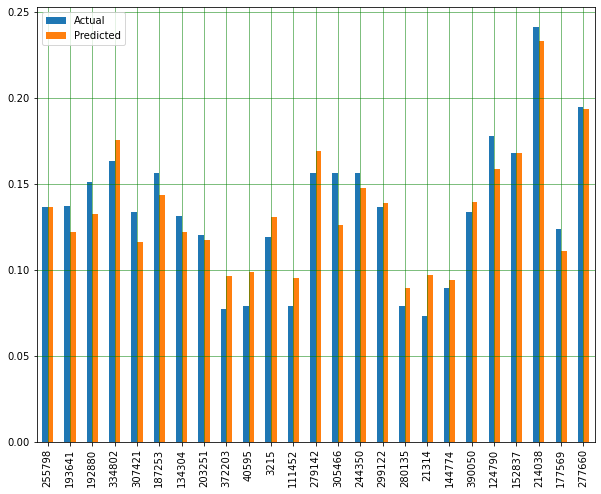

In [541]:
#Now let's plot the comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [542]:
#RMSE of test dataset
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_split)))

Root Mean Squared Error: 0.01977588926214484


You can see that the value of root mean squared error is 0.0197, which is more than 10% of the mean value of the intrest rate i.e.0.139463. This means that our algorithm was not very accurate but can still make reasonably decent predictions.

Now, a few things to consider. We validated our model once. What if the split we made just happened to be very conducive to this model? What if the split we made introduced a large skew into the date? Didn’t we significantly reduce the size of our training dataset by splitting it like that? Thus, lets validate our model using k-fold crosss validation technique and see how the predictions come out as.

In [543]:
#k-fold cross validation
from sklearn.model_selection import cross_val_predict
k_predictions = cross_val_predict(regressor, X_test, y_test, cv=20)
print(k_predictions)

[0.1361932  0.12188937 0.13169124 ... 0.1647022  0.11917677 0.13831881]


In [544]:
#spot the difference
df = pd.DataFrame({'Actual': y_test, 'Predicted': k_predictions})
df1 = df.head(25)
df1

,Actual,Predicted
255798,0.1365,0.136193
193641,0.1367,0.121889
192880,0.1510,0.131691
334802,0.1629,0.175506
307421,0.1335,0.116073
187253,0.1561,0.143213
134304,0.1311,0.121227
203251,0.1199,0.116981
372203,0.0769,0.095939
40595,0.0790,0.098975


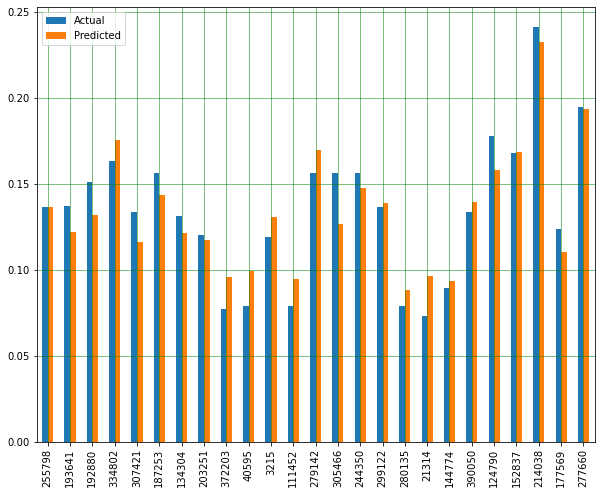

In [545]:
#Now let's plot the comparison of Actual and Predicted values with k-fold cross validation
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [546]:
#k-fold RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, k_predictions)))

Root Mean Squared Error: 0.019781738469959387


In [547]:
#Now let's do prediction on train data.
y_pred_train = regressor.predict(X_train)

In [548]:
#RMSE of train dataset
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Root Mean Squared Error: 0.019782817816447713


You can see that the value of k-fold root mean squared error is 0.0197, which is more than 10% of the mean value of the intrest rate i.e.0.139463. This means that our algorithm was not very accurate but can still make reasonably decent predictions. Also, I feel k-fold cross-validation is better than the generic train-test split, as it splits the data in creative ways in order to obtain the better estimates of “real world” model performance, and minimizes validation error. In addition, in our case train-test split has tested only on the 20% of the dataset. Whereas, k-fold will consider 20 groups during each iteration which somehow tries to minimize the error due to variance and bias. Also, my cross-validation RMSE and train RMSE are almost similar which indicates that my linear regression model is a good fit.

Lets also test and train our data on decision tree regressor model

In [549]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=3)
#Fit the regressor object to the dataset.
dt = DecisionTreeRegressor(max_depth=6,
                           min_samples_leaf=0.16,)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=0.16)

In [550]:
#Now let's do prediction on test data.
y_pred_split = dt.predict(X_test)

In [551]:
#Check the difference between the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_split})
df1 = df.head(25)
df1

,Actual,Predicted
255798,0.1365,0.138540
193641,0.1367,0.128436
192880,0.1510,0.128436
334802,0.1629,0.183776
307421,0.1335,0.128436
187253,0.1561,0.138540
134304,0.1311,0.128436
203251,0.1199,0.138540
372203,0.0769,0.086777
40595,0.0790,0.086777


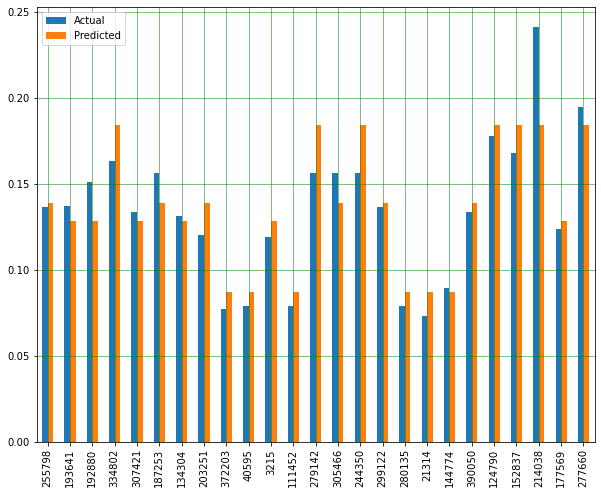

In [552]:
#Now let's plot the comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [553]:
#RMSE of test dataset
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_split)))

Root Mean Squared Error: 0.025504358229421306


In [554]:
#k-fold cross validation
from sklearn.model_selection import cross_val_predict
k_predictions = cross_val_predict(dt, X_test, y_test, cv=20)
print(k_predictions)

[0.13851857 0.12778229 0.12778229 ... 0.18392571 0.12773171 0.12773171]


In [555]:
#spot the difference
df = pd.DataFrame({'Actual': y_test, 'Predicted': k_predictions})
df1 = df.head(25)
df1

,Actual,Predicted
255798,0.1365,0.138519
193641,0.1367,0.127782
192880,0.1510,0.127782
334802,0.1629,0.183890
307421,0.1335,0.127782
187253,0.1561,0.138519
134304,0.1311,0.127782
203251,0.1199,0.138519
372203,0.0769,0.086831
40595,0.0790,0.086831


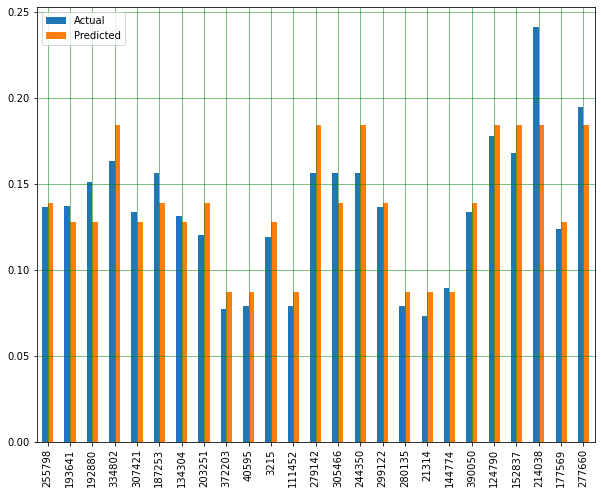

In [556]:
#Now let's plot the comparison of Actual and Predicted values with k-fold cross validation
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [557]:
#k-fold RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, k_predictions)))

Root Mean Squared Error: 0.025509723076790457


In [558]:
#Now let's do prediction on train data.
y_pred_train = dt.predict(X_train)

In [559]:
#RMSE of train dataset
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Root Mean Squared Error: 0.025386847872508455


If we closely observe RMSE values for train,test, and cross-validation scenarios, they are almost similar with a RMSE value of k-fold being slightly lower than the other two. Let's also apply Random forest regressor and decide the best model to predict our test dataset.

In [560]:
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
test_size=0.3,
random_state=SEED

In [561]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=250,
min_samples_leaf=0.12,
random_state=SEED)

In [562]:
#fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.12, n_estimators=250, random_state=1)

In [563]:
#Now let's do prediction on test data.
y_pred_split = rf.predict(X_test)

In [564]:
#Check the difference between the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_split})
df1 = df.head(25)
df1

,Actual,Predicted
255798,0.1365,0.139103
193641,0.1367,0.129313
192880,0.1510,0.129313
334802,0.1629,0.183783
307421,0.1335,0.129313
187253,0.1561,0.139103
134304,0.1311,0.129313
203251,0.1199,0.139103
372203,0.0769,0.086781
40595,0.0790,0.086781


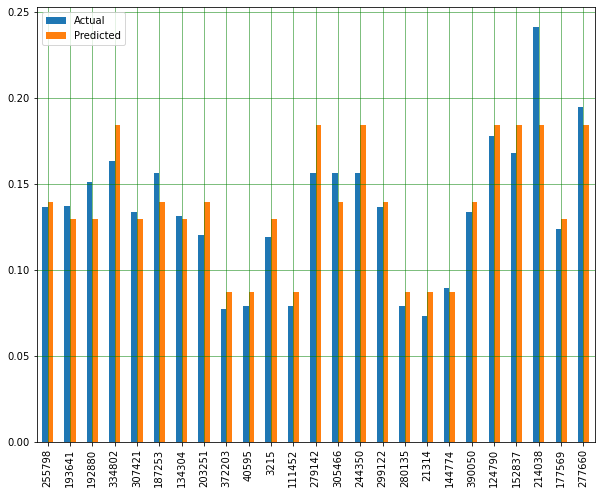

In [565]:
#Now let's plot the comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [566]:
#RMSE of test dataset
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_split)))

Root Mean Squared Error: 0.025505535789940626


In [567]:
#k-fold cross validation
from sklearn.model_selection import cross_val_predict
k_predictions = cross_val_predict(rf, X_test, y_test, cv=20)
print(k_predictions)

[0.13996284 0.12951537 0.12951537 ... 0.18393513 0.12948057 0.12948057]


In [568]:
#spot the difference
df = pd.DataFrame({'Actual': y_test, 'Predicted': k_predictions})
df1 = df.head(25)
df1

,Actual,Predicted
255798,0.1365,0.139963
193641,0.1367,0.129515
192880,0.1510,0.129515
334802,0.1629,0.183884
307421,0.1335,0.129515
187253,0.1561,0.139963
134304,0.1311,0.129515
203251,0.1199,0.139963
372203,0.0769,0.086834
40595,0.0790,0.086834


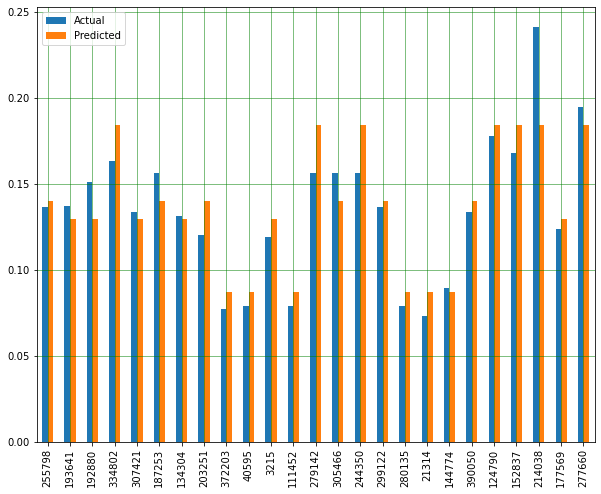

In [569]:
#Now let's plot the comparison of Actual and Predicted values with k-fold cross validation
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [570]:
#k-fold RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, k_predictions)))

Root Mean Squared Error: 0.02548951836402796


In [571]:
#Now let's do prediction on train data.
y_pred_train = dt.predict(X_train)

In [572]:
#RMSE of train dataset
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Root Mean Squared Error: 0.025386847872508455


Model fit assessment using RMSE: 

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

Thus, in our case, linear regression has the least RMSE values (0.01978 for train, test, and k-fold cross-validation) compared to decision tree regressor and random forest regressor. Therefore, Linear regression is the best model for the given scenario and hence we will be fitting our test data with LR model.

In [573]:
#Finally lets predict the intrest rate on our test dataset using random forest
y_pred = regressor.predict(test)

#Lets append y_pred column to our test dataset
test['X1'] = y_pred

#display the results
test.head()

#reorder the columns
test = test[['X1','X4','X5','X6','X7','X8','X9','X13','X14','X17','X19','X21','X22','X23','X24','X27','X28','X29','X30','X31','X32']]

In [574]:
test

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,0.161354,6000,6000,6000,36,2,14,68000.0,0,2,...,0.2831,0,47,1,18,0,19861,0.645,33,0
1,0.072528,24000,24000,24000,36,0,0,110480.0,0,2,...,0.1603,0,221,1,12,0,17001,0.262,36,1
2,0.137399,35000,35000,35000,36,2,11,86000.0,0,2,...,0.3249,0,562,0,16,0,25797,0.499,33,1
3,0.174622,10000,10000,10000,60,3,15,30000.0,1,2,...,0.3296,0,288,1,13,1,9586,0.438,21,1
4,0.116820,24000,24000,24000,60,1,5,82500.0,0,2,...,0.3103,0,40,0,27,0,31842,0.413,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.081482,6400,6400,6400,36,0,1,50000.0,2,1,...,0.1574,0,86,0,13,0,7185,0.479,15,0
79996,0.201075,30000,30000,30000,60,4,21,92000.0,0,1,...,0.1928,0,210,0,19,0,25151,0.513,38,0
79997,0.166450,17600,17600,17600,36,3,18,70000.0,2,1,...,0.1750,0,64,0,18,0,12161,0.371,36,0
79998,0.139002,2500,2500,2500,36,2,11,80000.0,2,2,...,0.1652,0,410,0,13,0,13031,0.767,23,0


In [577]:
test.to_csv("result.csv")